In [1]:
#Importing libraries
from scipy.io import arff
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer

In [2]:
#Importing dataset
data = arff.loadarff(r'ressources/dataset/chronic_kidney_disease.arff')
df = pd.DataFrame(data[0])


df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,b'1.020',b'1',b'0',b'?',b'normal',b'notpresent',b'notpresent',121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,b'yes',b'yes',b'no',b'good',b'no',b'no',b'ckd'
1,7.0,50.0,b'1.020',b'4',b'0',b'?',b'normal',b'notpresent',b'notpresent',NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
2,62.0,80.0,b'1.010',b'2',b'3',b'normal',b'normal',b'notpresent',b'notpresent',423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,b'no',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'
3,48.0,70.0,b'1.005',b'4',b'0',b'normal',b'abnormal',b'present',b'notpresent',117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,b'yes',b'no',b'no',b'poor',b'yes',b'yes',b'ckd'
4,51.0,80.0,b'1.010',b'2',b'0',b'normal',b'normal',b'notpresent',b'notpresent',106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'


In [3]:
#we must remove the b' in present in the sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class

In [4]:
#run only once
columns_to_decode=['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']
def fun_decode(columns,df):
    for col in columns :
        df[col]=df[col].str.decode('utf-8')
fun_decode(columns_to_decode,df)


In [5]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,?,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,?,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [6]:
X=df.shape[0]
Y=df.shape[1]
print("Number of rows",X,"\nNumber of columns",Y)

Number of rows 400 
Number of columns 25


In [7]:
per_ckd = df["class"][df["class"]=='ckd'].count()/X*100
per_non_ckd = 100-per_ckd
print("Percentage of ckd : ",per_ckd,"%","\nPercentage of non_ckd : ",per_non_ckd,"%")

Percentage of ckd :  62.5 % 
Percentage of non_ckd :  37.5 %


In [8]:
#we have 62.5% of the patients with ckd and 37.5% with no_ckd

In [9]:
df.dtypes

age      float64
bp       float64
sg        object
al        object
su        object
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [10]:
#replace ? with np.nan

In [11]:
df=df.replace('?', np.nan)

In [12]:
#convert sg,al,su to float
df["sg"] = df["sg"].astype(float)
df["al"] = df["al"].astype(float)
df["su"] = df["su"].astype(float)

In [13]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [14]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [15]:
#replacing the missing values with the mean for the numerical features
numeric_cols = df.columns[df.dtypes=="float64"].tolist()
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

In [16]:
object_cols=df.columns[df.dtypes=="object"].tolist()

In [17]:
#encoding categorical features
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for col in object_cols:
    df[col]= label_encoder.fit_transform(df[col])

In [18]:
#replacing the missing values with the KNN imputer for the categorical encoded features
imputer = KNNImputer(n_neighbors=3)
imputer.fit(df)

KNNImputer(n_neighbors=3)

In [19]:
imputed_data = imputer.transform(df)

In [20]:
df = pd.DataFrame(imputed_data, index=df.index, columns=df.columns)

In [21]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [22]:
#Features selection

<Axes: >

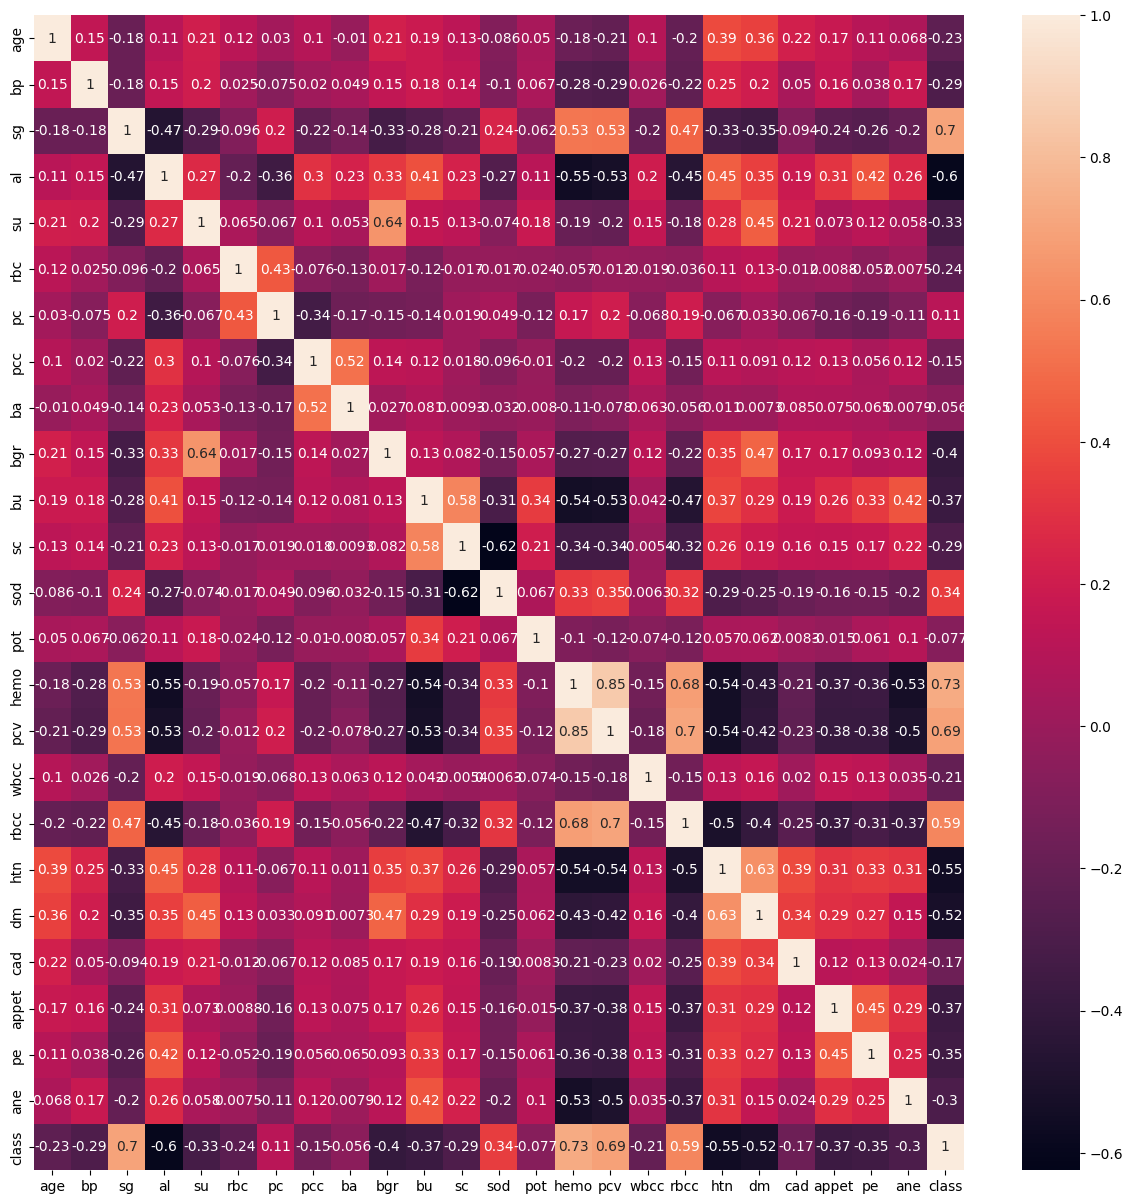

In [23]:
#corrolation matrix
plt.figure(figsize=(15,15))
cor=df.corr()
sns.heatmap(cor,annot=True)

In [24]:
#input split
X=df.drop(columns=["class"],axis=1)
y=df["class"]


In [25]:
rfecv= RFECV(estimator=RandomForestClassifier(),cv=StratifiedKFold(6),scoring='accuracy')

In [26]:
rfecv.fit(X,y)

RFECV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='accuracy')

In [27]:
#print("Optimum number of features: %d" % rfecv.n_features_)
print("Optimum number of features: %d" % 21)

Optimum number of features: 21


In [28]:
rfecv.grid_scores_

/home/wissem/workspace/projects/enhancing-chronic-kidney-disease-diagnose/enhancing-chronic-kidney-disease-diagnose-venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.92537313, 0.89552239, 0.85074627, 0.89552239, 0.81818182,
        0.93939394],
       [0.97014925, 0.91044776, 0.89552239, 0.94029851, 0.95454545,
        0.95454545],
       [0.97014925, 0.98507463, 0.95522388, 1.        , 0.98484848,
        0.98484848],
       [0.97014925, 1.        , 0.97014925, 0.97014925, 0.98484848,
        0.98484848],
       [0.97014925, 1.        , 1.        , 0.97014925, 0.98484848,
        1.        ],
       [0.98507463, 1.        , 1.        , 0.98507463, 1.        ,
        0.98484848],
       [0.98507463, 1.        , 0.97014925, 0.98507463, 1.        ,
        1.        ],
       [0.98507463, 1.        , 0.98507463, 0.98507463, 1.        ,
        1.        ],
       [0.97014925, 1.        , 0.97014925, 0.98507463, 1.        ,
        1.        ],
       [0.97014925, 1.        , 0.98507463, 0.98507463, 1.        ,
        1.        ],
       [0.97014925, 1.        , 0.98507463, 0.98507463, 1.        ,
        1.        ],
       [0.97014925, 0

In [29]:
selected_columns_list=[]
for i,col in zip(range(X.shape[1]),X.columns):
    if rfecv.support_[i]==True:
        selected_columns_list.append(col)
    print(f"{col} selected={rfecv.support_[i]} rank={rfecv.ranking_[i]} score={rfecv.grid_scores_[i]}")

age selected=False rank=5 score=[0.92537313 0.89552239 0.85074627 0.89552239 0.81818182 0.93939394]
bp selected=False rank=9 score=[0.97014925 0.91044776 0.89552239 0.94029851 0.95454545 0.95454545]
sg selected=True rank=1 score=[0.97014925 0.98507463 0.95522388 1.         0.98484848 0.98484848]
al selected=True rank=1 score=[0.97014925 1.         0.97014925 0.97014925 0.98484848 0.98484848]
su selected=False rank=7 score=[0.97014925 1.         1.         0.97014925 0.98484848 1.        ]
rbc selected=True rank=1 score=[0.98507463 1.         1.         0.98507463 1.         0.98484848]
pc selected=False rank=10 score=[0.98507463 1.         0.97014925 0.98507463 1.         1.        ]
pcc selected=False rank=17 score=[0.98507463 1.         0.98507463 0.98507463 1.         1.        ]
ba selected=False rank=15 score=[0.97014925 1.         0.97014925 0.98507463 1.         1.        ]
bgr selected=True rank=1 score=[0.97014925 1.         0.98507463 0.98507463 1.         1.        ]
bu sele

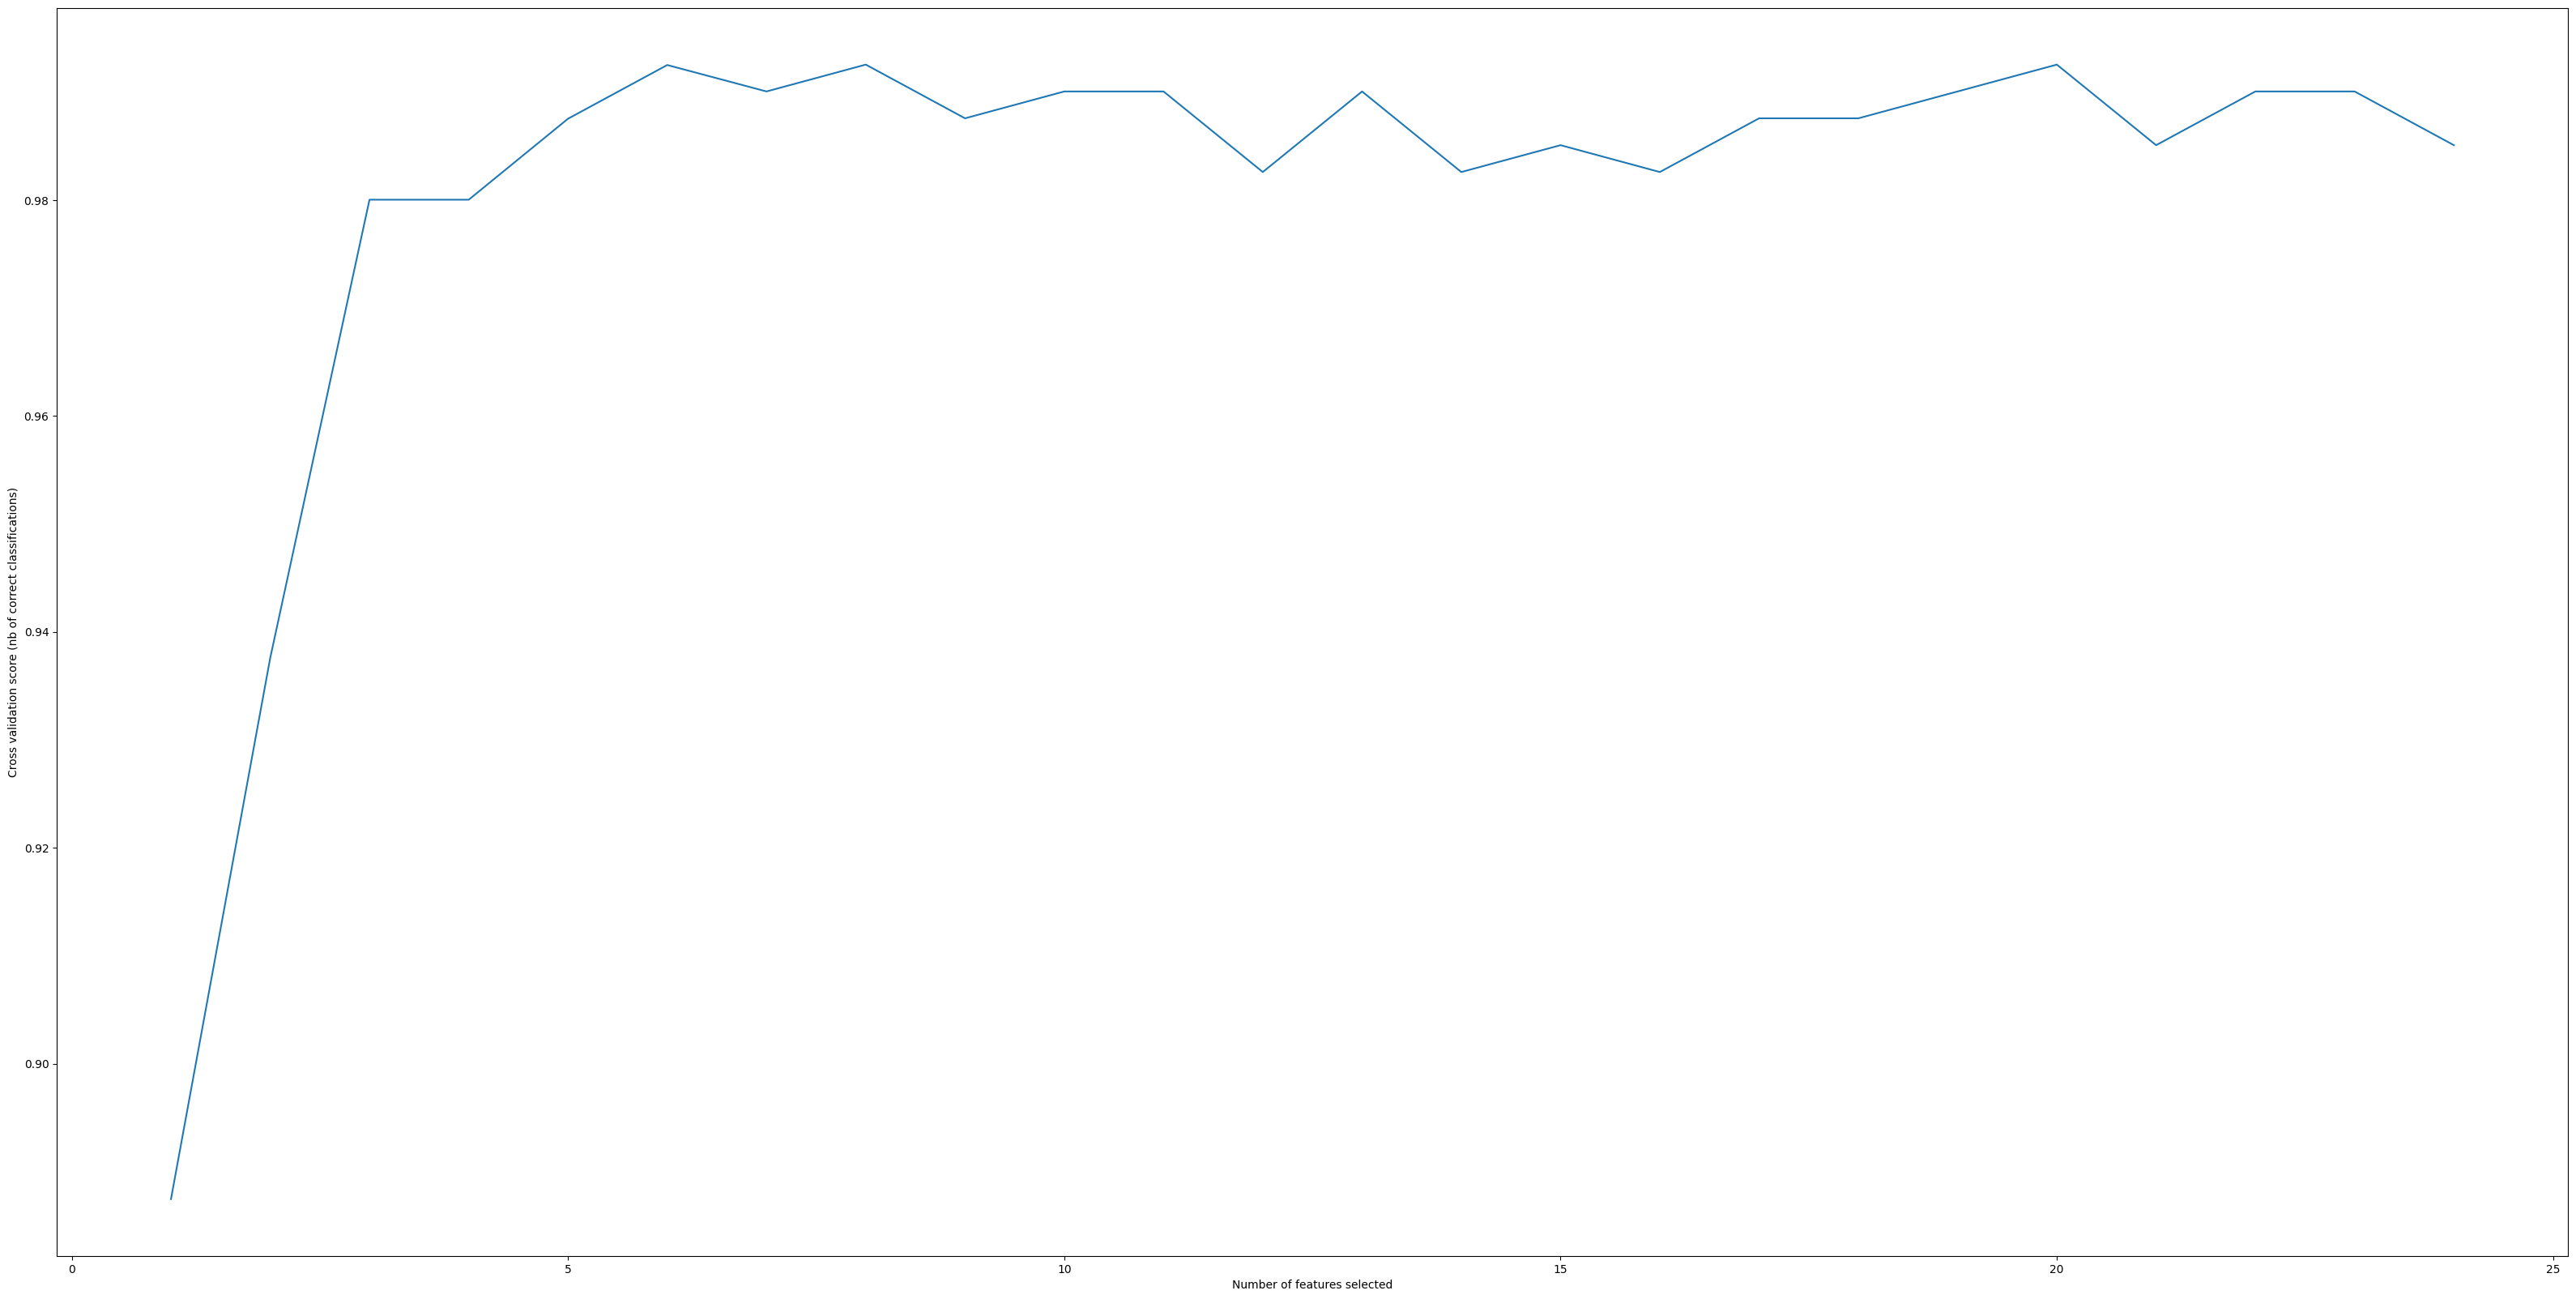

In [30]:
plt.figure(figsize=(40, 20))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) +1), [np.mean(x) for x in rfecv.grid_scores_])
plt.show()

In [31]:
#Keeping the chosen columns by the rfe

In [32]:
for feature in X.columns:
    if feature not in selected_columns_list:
        X.drop(feature, axis=1, inplace=True)    

In [33]:
X

,sg,al,rbc,bgr,sc,hemo,pcv,rbcc
0,1.020,1.0,2.0,121.000000,1.2,15.4,44.0,5.200000
1,1.020,4.0,2.0,148.036517,0.8,11.3,38.0,4.707435
2,1.010,2.0,1.0,423.000000,1.8,9.6,31.0,4.707435
3,1.005,4.0,1.0,117.000000,3.8,11.2,32.0,3.900000
4,1.010,2.0,1.0,106.000000,1.4,11.6,35.0,4.600000
...,...,...,...,...,...,...,...,...
395,1.020,0.0,1.0,140.000000,0.5,15.7,47.0,4.900000
396,1.025,0.0,1.0,75.000000,1.2,16.5,54.0,6.200000
397,1.020,0.0,1.0,100.000000,0.6,15.8,49.0,5.400000
398,1.025,0.0,1.0,114.000000,1.0,14.2,51.0,5.900000


In [34]:
#Classification 

In [35]:
#Defining train and test data
X
y=df["class"]
X

,sg,al,rbc,bgr,sc,hemo,pcv,rbcc
0,1.020,1.0,2.0,121.000000,1.2,15.4,44.0,5.200000
1,1.020,4.0,2.0,148.036517,0.8,11.3,38.0,4.707435
2,1.010,2.0,1.0,423.000000,1.8,9.6,31.0,4.707435
3,1.005,4.0,1.0,117.000000,3.8,11.2,32.0,3.900000
4,1.010,2.0,1.0,106.000000,1.4,11.6,35.0,4.600000
...,...,...,...,...,...,...,...,...
395,1.020,0.0,1.0,140.000000,0.5,15.7,47.0,4.900000
396,1.025,0.0,1.0,75.000000,1.2,16.5,54.0,6.200000
397,1.020,0.0,1.0,100.000000,0.6,15.8,49.0,5.400000
398,1.025,0.0,1.0,114.000000,1.0,14.2,51.0,5.900000


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1024)

In [37]:
#SVM + RBF(Radial Basis Function)

In [38]:
#The rbf requires the data to be centred and scaled

In [39]:
#We will use the standardscaling
scale = StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.fit_transform(X_test)

In [40]:
# Grid Search for SVM

hyperparameters = {
    'C': [1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf']}

svm = SVC()

svm_cv = GridSearchCV(estimator=svm, param_grid=hyperparameters, cv=10, n_jobs=-1)

svm_cv.fit(X_train, y_train)

svm_cv.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [41]:
svm = SVC(C=100, gamma=0.0001, kernel='rbf') #C and gamma are parameters that infulence the rbf method
svm.fit(X_train, y_train)

SVC(C=100, gamma=0.0001)

In [42]:
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        62
         1.0       0.97      1.00      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [43]:
#Plotting the confusion Matrix

/home/wissem/workspace/projects/enhancing-chronic-kidney-disease-diagnose/enhancing-chronic-kidney-disease-diagnose-venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


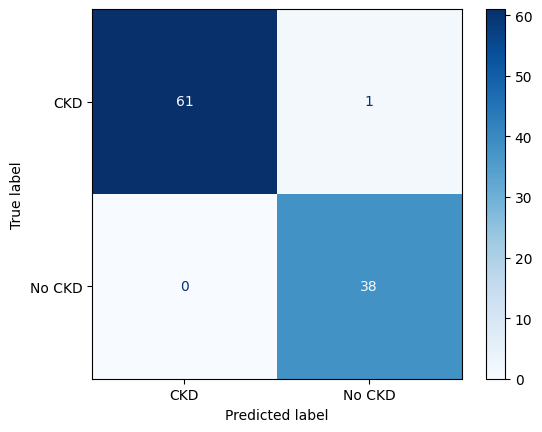

In [44]:
confusion_matrix(y_pred_svm ,
                     y_test
                     )
plot_confusion_matrix(svm, X_test, y_test, cmap=plt.cm.Blues,display_labels=['CKD','No CKD'])

In [45]:
#Plotting the Dicision boundary

In [46]:
#We can't draw a 19 dimensinal graph so we need to reduce the dimensions to 2 so we will use the PCA and take PC1 and PC2.

In [47]:
pca=PCA(svd_solver='full')

In [48]:
Principal_components=pca.fit_transform(X_train_scaled)
#number of calculated components
print(pca.n_components_)
#print PCs
print(Principal_components)

8
[[ 2.14211843  1.30658353  0.93407552 ...  1.18881945 -0.32954872
  -0.48279984]
 [ 2.37799682 -1.50335831 -1.38205145 ... -0.05021913  2.06984411
  -0.39160025]
 [ 5.08574033  2.18562577 -0.56600399 ... -0.34609438 -0.64856191
   0.06127221]
 ...
 [-0.68019163 -1.31938275 -0.25525552 ... -0.03643269  0.09447476
  -0.05397706]
 [ 1.33205871 -1.12314881 -0.69427529 ...  0.75710089 -0.35938959
  -0.24999214]
 [ 1.13442613 -1.45346952 -0.60547784 ...  0.0570845   0.07069501
   0.03091345]]


In [49]:
np.set_printoptions(3)
print(pca.explained_variance_ratio_)


[0.453 0.138 0.12  0.094 0.072 0.056 0.048 0.018]


In [50]:
n = df.shape[0]
p=df.shape[1]
eigval = (n-1)/n*pca.explained_variance_
print(eigval)
#the eigenvalues of an axis reflect the variation ratio of information

[3.628 1.104 0.965 0.756 0.578 0.445 0.385 0.145]


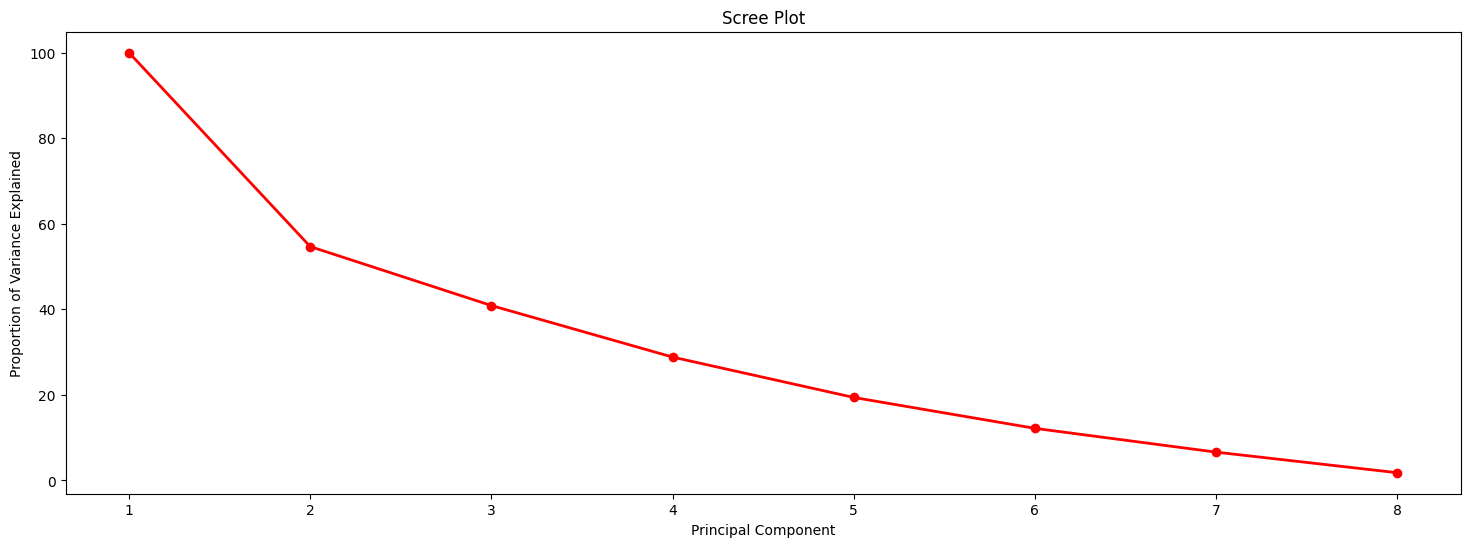

In [51]:
#show the scree plot of the PCA:
aze=np.cumsum(pca.explained_variance_ratio_[::-1])[::-1]
plt.figure(figsize=(18,6))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, aze*100, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [52]:
#Drawing the graph with PC1 and PC2

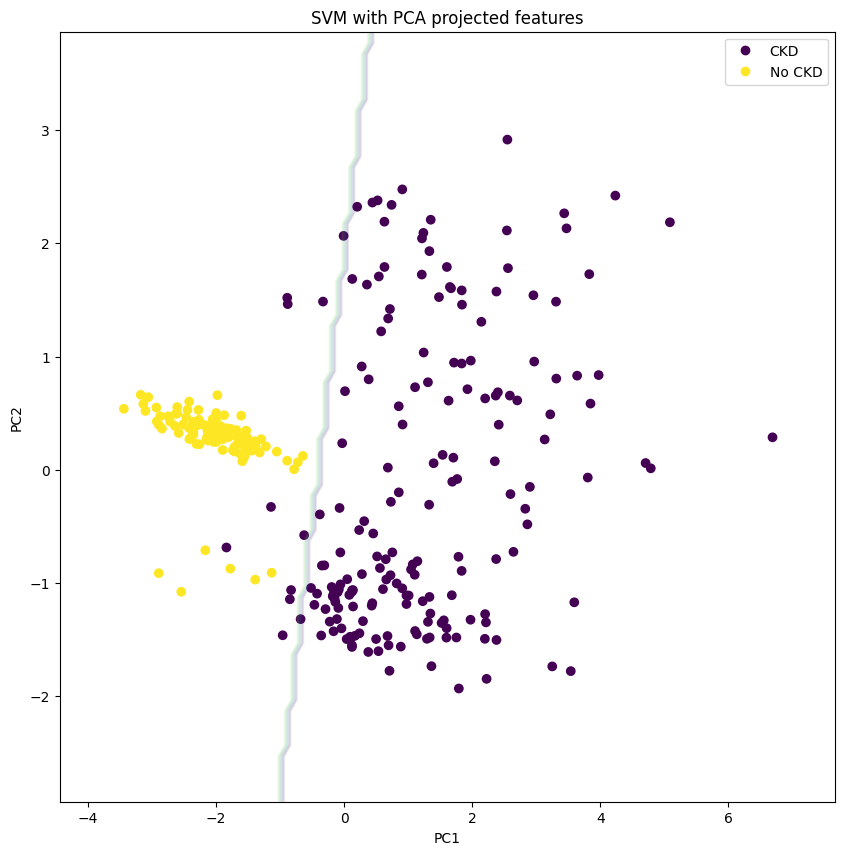

In [53]:
X_train_pca=pca.fit_transform(X_train_scaled)
train_pc1_coords=X_train_pca[:,0]
train_pc2_coords=X_train_pca[:,1]

scaler = StandardScaler()
scaler.fit(np.column_stack((train_pc1_coords,train_pc2_coords)))
pca_train_scaled = scaler.transform(np.column_stack((train_pc1_coords,train_pc2_coords)))


clf_svm = SVC(random_state=42,C=100, gamma=0.0001)
clf_svm.fit(pca_train_scaled,y_train)

test_pc1_coords = Principal_components[:,0]
test_pc2_coords = Principal_components[:,1]
#Lets create a matrix of points that we can use to show the discion regions.
x_min = test_pc1_coords.min()-1
x_max = test_pc1_coords.max()+1

y_min = test_pc2_coords.min()-1
y_max = test_pc2_coords.max()+1

xx,yy = np.meshgrid(np.arange(start=x_min,stop=x_max,step=0.1),
                   np.arange(start=y_min,stop=y_max,step=0.1))

Z=clf_svm.predict(np.column_stack((xx.ravel(),yy.ravel())))
Z=Z.reshape(xx.shape)
fig,ax=plt.subplots(figsize=(10,10))

ax.contour(xx,yy,Z,alpha=0.1)

scatter=ax.scatter(test_pc1_coords,test_pc2_coords,c=y_train)
legend=ax.legend(scatter.legend_elements()[0],
                scatter.legend_elements()[1],
                loc="upper right")

legend.get_texts()[0].set_text("CKD")
legend.get_texts()[1].set_text("No CKD")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title("SVM with PCA projected features")
plt.show()

In [54]:
#Knn

In [55]:
# Grid Search for KNN

hyperparameters = {
    'leaf_size' : list(range(1,30)),
    'n_neighbors' : list(range(1,25))
}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator=knn, param_grid=hyperparameters, cv=10, n_jobs=-1)

knn_cv.fit(X_train_scaled, y_train)

knn_cv.best_params_

{'leaf_size': 1, 'n_neighbors': 1}

In [56]:
knn = KNeighborsClassifier(leaf_size=1, p=2, n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=1)

In [57]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn)) ### precision is not good

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94        62
         1.0       0.90      0.92      0.91        38

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [58]:
#Plot knn

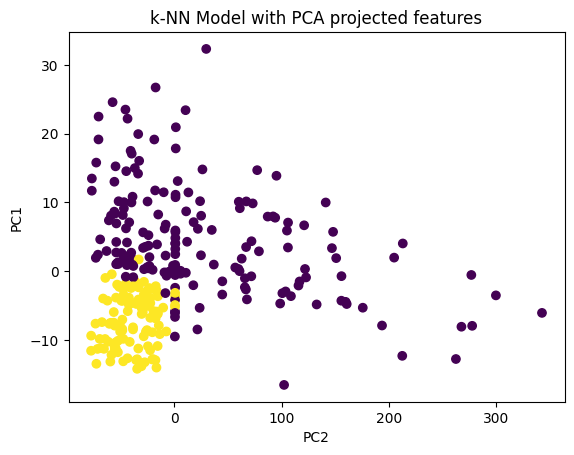

In [59]:
# Reduce the dimensionality of the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Train a k-NN model
model = KNeighborsClassifier()
model.fit(X_pca, y_train)

# Make predictions on the data
y_pred = model.predict(X_pca)

# Create a scatter plot of the predictions
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)

# Add labels and title
plt.xlabel("PC2")
plt.ylabel("PC1")
plt.title("k-NN Model with PCA projected features")

# Show the plot
plt.show()


In [60]:
X_train_pca=pca.fit_transform(X_train_scaled)
train_pc1_coords=X_train_pca[:,0]
train_pc2_coords=X_train_pca[:,1]

scaler = StandardScaler()
scaler.fit(np.column_stack((train_pc1_coords,train_pc2_coords)))
pca_train_scaled = scaler.transform(np.column_stack((train_pc1_coords,train_pc2_coords)))

knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=1)

In [61]:
#Decision Tree

In [62]:
# Grid Search for Decision Tree

hyperparameters = {
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.1, 0.01, 0.001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']}

decision_tree = DecisionTreeClassifier()

decision_tree_cv = GridSearchCV(estimator=decision_tree, param_grid=hyperparameters, cv=10, n_jobs=-1)

decision_tree_cv.fit(X_train, y_train)

decision_tree_cv.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt'}

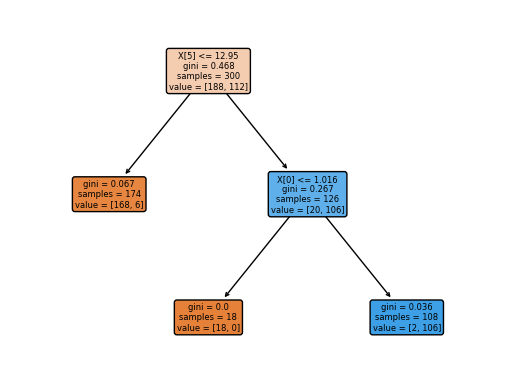

<Figure size 10000x5000 with 0 Axes>

In [63]:
decision_tree = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_features='sqrt', criterion="gini")
decision_tree.fit(X_train, y_train)
plot_tree(decision_tree, filled=True, fontsize=6, rounded = True, max_depth=4)
fig = plt.figure(figsize=(100,50))
plt.show()

In [64]:
y_pred_dt = decision_tree.predict(X_test)
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        61
         1.0       1.00      0.97      0.99        39

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [65]:
#Random Forest

In [66]:
# Grid Search for Random Forest

hyperparameters = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
random_forest = RandomForestClassifier()

random_forest_cv = GridSearchCV(estimator=random_forest, param_grid=hyperparameters, cv=10, n_jobs=-1)

random_forest_cv.fit(X_train, y_train)

random_forest_cv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}

In [67]:
random_forest = RandomForestClassifier(criterion= 'gini', max_depth=5, n_estimators= 200)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [68]:
y_pred_rf = random_forest.predict(X_test)
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        61
         1.0       1.00      0.97      0.99        39

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [69]:
#Comparision of ther preformance of the used classification algorithms : SVM,KNN,Decision Trees, Random Forest

In [70]:
#Defining precison score for each model
ps_svm=precision_score(y_test, y_pred_svm)
ps_knn=precision_score(y_test, y_pred_knn)
ps_dt=precision_score(y_pred_dt, y_test)
ps_rf=precision_score(y_pred_rf, y_test)
precision_score_List=[ps_svm,ps_knn,ps_dt,ps_rf]
#Defining recall for each model
recall_svm=recall_score(y_test, y_pred_svm)
recall_knn=recall_score(y_test, y_pred_knn)
recall_dt=recall_score(y_pred_dt, y_test)
recall_rf=recall_score(y_pred_rf, y_test)
recall_List=[recall_svm,recall_knn,recall_dt,recall_rf]
#Defining recall for each model
f1_score_svm=f1_score(y_test, y_pred_svm)
f1_score_knn=f1_score(y_test, y_pred_knn)
f1_score_dt=f1_score(y_pred_dt, y_test)
f1_score_rf=f1_score(y_pred_rf, y_test)
f1_score_List=[f1_score_svm,f1_score_knn,f1_score_dt,f1_score_rf]

In [71]:
Algorithm_Name_List=["SVM","KNN","Decision Tree","Random Forest"]
metrics_List=["precison score","recall","f1-score"]

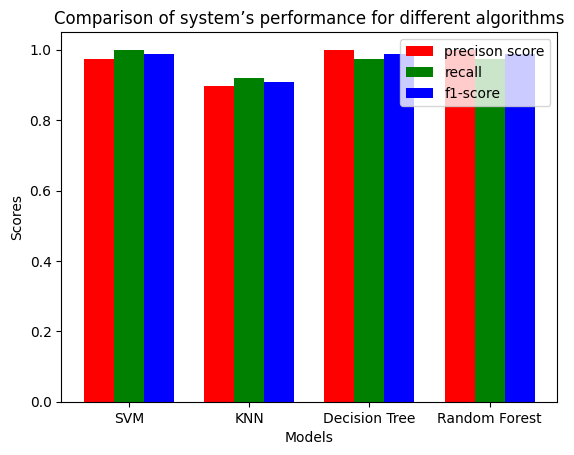

In [72]:
N = 4
ind = np.arange(N)
width = 0.25


bar1 = plt.bar(ind, precision_score_List, width, color = 'r')


bar2 = plt.bar(ind+width, recall_List, width, color='g')


bar3 = plt.bar(ind+width*2, f1_score_List, width, color = 'b')


plt.xlabel("Models")
plt.ylabel('Scores')
plt.title("Comparison of system’s performance for different algorithms")

plt.xticks(ind+width,Algorithm_Name_List)
plt.legend( (bar1, bar2, bar3), (metrics_List) )
plt.show()
